In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

## **Parameters**

In [ ]:
''' duffing '''
alpha1 = 4*np.pi**2
alpha2 = 2*np.pi**2
beta = 1
dampingcoeff= 0.001
delta = dampingcoeff*4*np.pi
a = 5 # excitation amplitude
X0=[1,2,0,1]

In [ ]:
 ''' sweep '''
f0 = 0.5 # initial frequency (Hz)
fend = 1.5 # final frequency (Hz)
v_sweep = 0.1 #Hz/min
#v=(fend-f0)/Tsimul
v=v_sweep/60 #Hz/s



In [ ]:
''' Simulation '''
fs=20*fend
Tsimul = (fend-f0)/v # how long the simulation lasts
Npoint = int(Tsimul*fs)
print(Tsimul)
T = np.linspace(0,Tsimul,Npoint+1)
freq= lambda t: f0+ v*t
FREQ=np.vectorize(freq)
F=FREQ(T)
F3=3*F

600.0


In [ ]:
Npoint+1

18001

# **Duffing two degree of freedom**

$\ddot{x} + (\alpha_{1} x - \alpha_{2}y) + \beta x^{3} + \delta \dot{x} = excitation(t)$ \
$\ddot{y} +  (\alpha_{1}y - \alpha_{2}x) + \delta \dot{y} = 0$ \:


$X=[x,y,\dot{x},\dot{y}]$\
$\dot{X}=[\dot{x},\dot{y},\ddot{x},\ddot{y}]$


In [ ]:
def TwoDOF(t, X, excitation):
  x = X[0]
  y = X[1]
  derivx = X[2]
  derivy = X[3]
  dderivx = - alpha1*x + alpha2*y - beta*x**3 - delta*derivx + excitation(t)
  dderivy = - alpha1*y + alpha2*x  - delta*derivy
  derivX=[derivx, derivy, dderivx, dderivy]
  return derivX

# **Linear frequency sweep**
$sweep = sin[2 \pi * (\frac{v}{2} t^{2} + f_{0}t)]     $


In [ ]:
sweep = lambda t : a*sin(2*np.pi * (v/2 * t**2 + f0*t))

'''
Sw=np.vectorize(sweep)
S=Sw(T)

fig,ax=plt.subplots(3)

ax[0].plot(T,S)
#ax[0].xlim(200,205)

ax[1].plot(T,S)
ax[1].set_xlim(0,5)

ax[2].plot(T,S)
ax[2].set_xlim(Tsimul-5,Tsimul)
'''

'\nSw=np.vectorize(sweep)\nS=Sw(T)\n\nfig,ax=plt.subplots(3)\n\nax[0].plot(T,S)\n#ax[0].xlim(200,205)\n\nax[1].plot(T,S)\nax[1].set_xlim(0,5)\n\nax[2].plot(T,S)\nax[2].set_xlim(Tsimul-5,Tsimul)\n'

#**Solve ODE** Runge Kutta

In [ ]:
def rk4(f,t0,x0,tn,n):
    # Calculating step size
    h = (tn-t0)/n
    X=[x0]
    for i in range(n):
        k1 = np.multiply(h,(f(t0, x0)))
        k2 = np.multiply(h, (f((t0+h/2), (x0+k1/2))))
        k3 = np.multiply(h, (f((t0+h/2), (x0+k2/2))))
        k4 = np.multiply(h, (f((t0+h), (x0+k3))))
        k = (k1+2*k2+2*k3+k4)/6
        xn = x0 + k
        
        x0 = xn
        t0 = t0+h
        X.append(xn)
    
    return X



# **Graphiques**

In [ ]:
def create_signal(X0, tfin,Npoint):
  T = np.linspace(0,tfin,Npoint+1)
  f = lambda t, X : TwoDOF(t, X, sweep)
  X=rk4(f,0,X0,tfin,Npoint)
  return (T,X)



Text(0.5, 1.0, 'Y')

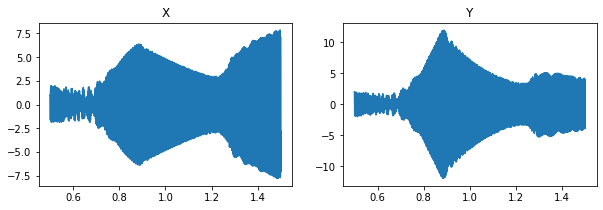

In [ ]:
(T,X)=create_signal(X0,Tsimul,Npoint)
X1=(np.array(X).T)[0]
Y1=(np.array(X).T)[1]
fig,ax=plt.subplots(1,2, figsize=(10, 3))

ax[0].plot(F,X1)
ax[0].set_title('X')
ax[1].plot(F,Y1)
ax[1].set_title('Y')

# **Wavelet transform**

In [ ]:
X1.tofile('2dof2.csv', sep = ',')
files.download('2dof2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Parameters

In [ ]:
import pywt
from matplotlib import ticker
from  matplotlib.colors import LogNorm

''' Choosing scales '''
desiredfreq = np.linspace(f0,3*fend,100)

scale=lambda f : 0.8125*fs/f
SCALE = np.vectorize(scale)
sampling_period = 1/fs
scales=SCALE(desiredfreq)

'''' Other pararmeters '''
wavelet="morl"
sampling_period = 1/fs
ABS=np.vectorize(abs)

# Duffing scalogram

In [ ]:
'''data=X1
coef, freqs=pywt.cwt(data, scales, wavelet, sampling_period)
coef=ABS(coef)'''

In [ ]:
'''coefsweep.tofile('waveletsweep.csv', sep = ',')
files.download('waveletsweep.csv')'''

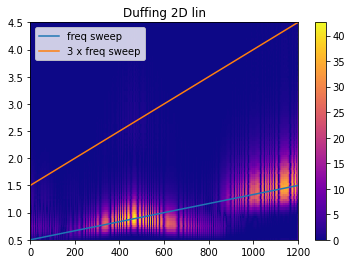

In [ ]:
'''plt.pcolormesh(T,freqs,coef,cmap="plasma")
plt.plot(T,F,label='freq sweep')
plt.title("Duffing 2D lin")
plt.plot(T,F3, label='3 x freq sweep')
plt.legend()
plt.colorbar()'''

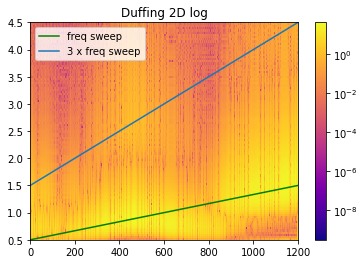

In [ ]:
'''plt.pcolormesh(T,freqs,coef,cmap="plasma",norm=LogNorm(vmin=coef.min(), vmax=coef.max()))
plt.title("Duffing 2D log")
plt.plot(T,F, label='freq sweep', color='green')
plt.plot(T,F3, label='3 x freq sweep')
plt.legend()
plt.colorbar()'''

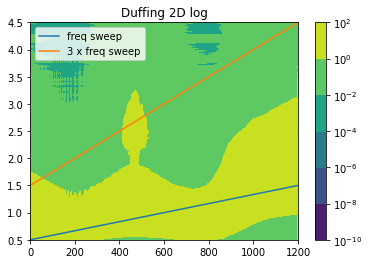

In [ ]:
'''plt.contourf(T,freqs,coef,locator=ticker.LogLocator())
plt.title("Duffing 2D log")
plt.colorbar()
plt.plot(T,F, label='freq sweep')
plt.plot(T,F3, label='3 x freq sweep')
plt.legend()'''